# Import Data

In [6]:
from keras.preprocessing.image import ImageDataGenerator

#crÃ©ation de nouvelles images deformation rotation d'anciennes images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (224, 224),
                                                 color_mode='rgb',
                                                 batch_size = 8,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (224,224),
                                            color_mode='rgb',
                                            batch_size = 1,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Modelling

In [7]:
# Importing libraries
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

In [8]:
classifier = Sequential()

classifier.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2), strides = (2, 2)))


classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2), strides = (2, 2)))

classifier.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2), strides = (2, 2)))

classifier.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2), strides = (2, 2)))

classifier.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2), strides = (2, 2)))


classifier.add(Flatten())
classifier.add(Dense(256, activation='relu', name='fc1'))
classifier.add(Dropout(rate=0.5, name='dropout1'))
classifier.add(Dense(128, activation='relu', name='fc2'))
classifier.add(Dropout(rate=0.5, name='dropout2'))
classifier.add(Dense(1, activation='sigmoid', name='fc3'))

In [9]:
classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history=classifier.fit_generator(steps_per_epoch=100,generator=training_set, validation_data= test_set, validation_steps=10,epochs=20,callbacks=[checkpoint,early])

Epoch 1/20
100/100 [==============================] - 25s 246ms/step - loss: 3.2259 - accuracy: 0.7113 - val_loss: 4.6095e-04 - val_accuracy: 0.7000
Epoch 2/20


c:\users\sylvain\.conda\envs\test\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
c:\users\sylvain\.conda\envs\test\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 26s 258ms/step - loss: 1.3747 - accuracy: 0.6812 - val_loss: 1.4728e-07 - val_accuracy: 0.7000
Epoch 3/20
100/100 [==============================] - 26s 264ms/step - loss: 0.6012 - accuracy: 0.7725 - val_loss: 5.4880e-12 - val_accuracy: 0.5000
Epoch 4/20
100/100 [==============================] - 27s 270ms/step - loss: 0.5677 - accuracy: 0.7650 - val_loss: 2.1575 - val_accuracy: 0.5000
Epoch 5/20
100/100 [==============================] - 27s 273ms/step - loss: 0.4198 - accuracy: 0.7975 - val_loss: 1.7902 - val_accuracy: 0.3000
Epoch 6/20
100/100 [==============================] - 27s 268ms/step - loss: 0.4981 - accuracy: 0.7588 - val_loss: 9.6799 - val_accuracy: 0.4000
Epoch 7/20
100/100 [==============================] - 27s 271ms/step - loss: 0.4534 - accuracy: 0.7700 - val_loss: 2.9432e-04 - val_accuracy: 0.6000
Epoch 8/20
100/100 [==============================] - 27s 274ms/step - loss: 0.4208 - accuracy: 0.7688 - val_loss: 1.4685e-07 - v

In [ ]:
classifier.save('D:/chest-xray-pneumonia/chest_xray/model3.h5')

In [ ]:
from keras.models import load_model
classifier = load_model('D:/chest-xray-pneumonia/chest_xray/model3.h5')

In [21]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 64)     

In [22]:
test_loss, test_score = classifier.evaluate(test_set)

624/624 [==============================] - 9s 15ms/step


In [23]:
test_loss,test_score

(0.1753443479537964, 0.7580128312110901)

In [24]:
preds = classifier.predict_generator(test_set)

In [25]:
orig_test_labes= test_set.classes
orig_test_labes=np.reshape(orig_test_labes,(624,1))

In [26]:
preds[preds<0.5]=0 
preds[preds>=0.5]=1

<Figure size 432x288 with 0 Axes>

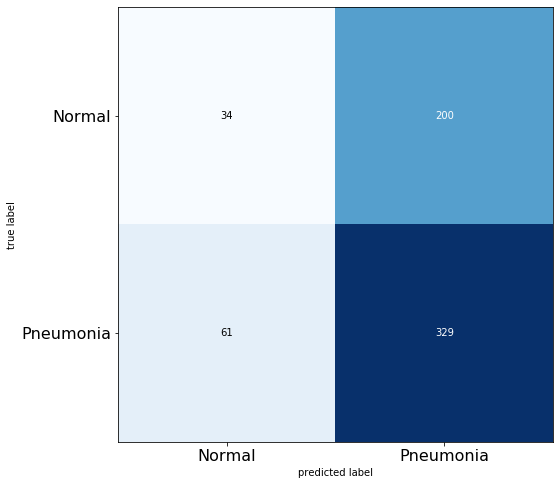

In [27]:
import matplotlib.pyplot as plt
cm  = confusion_matrix(orig_test_labes, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [28]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.84
Precision of the model is 0.62


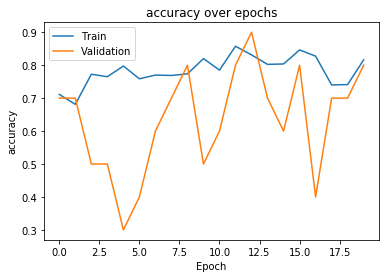

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy over epochs')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()